<a href="https://colab.research.google.com/github/kunal266/Algo_Practice/blob/main/time_series_analysis/prophet_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from fbprophet import Prophet


In [2]:
df = pd.read_csv('/content/drive/MyDrive/UDEMY_TSA_FINAL/Data/Miles_Traveled.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [4]:
df.columns =['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

In [5]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


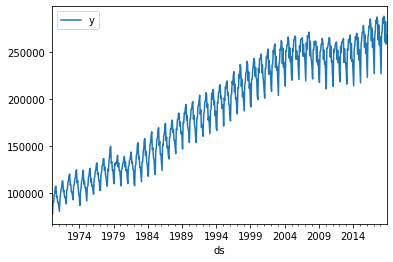

In [6]:
df.plot(x='ds',y='y')

In [7]:
len(df)

588

In [8]:
train = df.iloc[:576]
test = df.iloc[576:]

In [9]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
forecast = m.predict(future)


In [12]:
forecast.tail(12)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
576,2018-01-01,262481.916811,238150.610569,249323.987871,262481.916811,262481.916811,-18591.376116,-18591.376116,-18591.376116,-18591.376116,-18591.376116,-18591.376116,0.0,0.0,0.0,243890.540695
577,2018-02-01,262624.605744,229481.233506,240890.495589,262624.605744,262624.605744,-27106.419824,-27106.419824,-27106.419824,-27106.419824,-27106.419824,-27106.419824,0.0,0.0,0.0,235518.185920
578,2018-03-01,262753.486072,257261.144103,268205.982421,262753.486072,262753.486072,-32.441456,-32.441456,-32.441456,-32.441456,-32.441456,-32.441456,0.0,0.0,0.0,262721.044615
579,2018-04-01,262896.175005,257210.821547,268540.831915,262896.175005,262896.175005,30.368471,30.368471,30.368471,30.368471,30.368471,30.368471,0.0,0.0,0.0,262926.543476
580,2018-05-01,263034.261070,267042.307304,278087.078469,263034.261070,263034.261070,9619.702150,9619.702150,9619.702150,9619.702150,9619.702150,9619.702150,0.0,0.0,0.0,272653.963220
581,2018-06-01,263176.950004,266929.813741,278698.042993,263175.769240,263179.136353,9727.851467,9727.851467,9727.851467,9727.851467,9727.851467,9727.851467,0.0,0.0,0.0,272904.801470
582,2018-07-01,263315.036068,273574.793229,285580.107779,263297.795888,263336.264346,16050.336015,16050.336015,16050.336015,16050.336015,16050.336015,16050.336015,0.0,0.0,0.0,279365.372083
583,2018-08-01,263457.725002,274262.107429,285996.528423,263413.528709,263503.539378,16443.644514,16443.644514,16443.644514,16443.644514,16443.644514,16443.644514,0.0,0.0,0.0,279901.369516
584,2018-09-01,263600.413936,256145.214464,268031.915032,263533.142783,263669.410359,-1674.285262,-1674.285262,-1674.285262,-1674.285262,-1674.285262,-1674.285262,0.0,0.0,0.0,261926.128674
585,2018-10-01,263738.500000,263411.896935,274885.953965,263639.874738,263844.913503,5300.999421,5300.999421,5300.999421,5300.999421,5300.999421,5300.999421,0.0,0.0,0.0,269039.499421


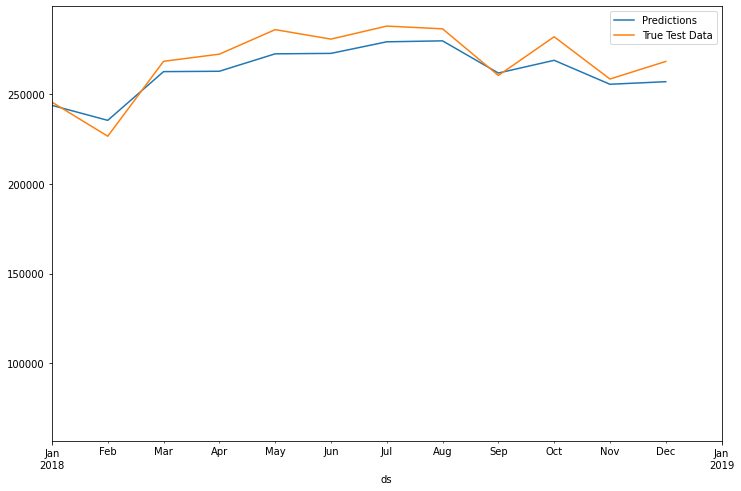

In [14]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='True Test Data',legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'))

In [16]:
from statsmodels.tools.eval_measures import rmse

In [17]:
predictions = forecast.iloc[-12:]['yhat']
predictions

576    243890.540695
577    235518.185920
578    262721.044615
579    262926.543476
580    272653.963220
581    272904.801470
582    279365.372083
583    279901.369516
584    261926.128674
585    269039.499421
586    255666.543633
587    257094.193073
Name: yhat, dtype: float64

In [18]:
rmse(predictions,test['y'])

8588.50451989775

In [19]:
test.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


y    268739.666667
dtype: float64

In [21]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [22]:
#INITIAL
initial = 5*365
initial = str(initial) +' days'

In [23]:
initial

'1825 days'

In [24]:
# PERIOD
period= 5*365
period = str(period) + ' days'


In [25]:
horizon = 365
horizon = str(horizon) + ' days'

In [26]:
df_cv  = cross_validation(m,initial=initial,period=period,horizon=horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

In [27]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.087478,107052.332379,109956.941648,102445.0,1976-12-11
1,1977-02-01,102996.111557,101582.249078,104561.655797,102416.0,1976-12-11
2,1977-03-01,118973.318267,117540.653203,120471.306001,119960.0,1976-12-11
3,1977-04-01,120612.923861,119187.654956,122158.956127,121513.0,1976-12-11
4,1977-05-01,127883.031986,126440.629187,129332.136114,128884.0,1976-12-11


In [28]:
len(df_cv)

108

In [29]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,52 days,2.430030e+07,4929.533140,4534.578066,0.027790,0.023419,0.4
1,53 days,2.180221e+07,4669.283718,4269.242480,0.025045,0.023419,0.4
2,54 days,1.835927e+07,4284.771500,3749.319270,0.020183,0.022331,0.5
3,55 days,2.318231e+07,4814.801050,4262.593972,0.023194,0.023419,0.4
4,57 days,2.101189e+07,4583.872792,4000.766561,0.021482,0.022331,0.5
...,...,...,...,...,...,...,...
94,360 days,1.833685e+07,4282.155252,3750.317263,0.019550,0.019595,0.5
95,361 days,1.744517e+07,4176.741529,3472.704963,0.018164,0.018940,0.5
96,362 days,3.175299e+07,5634.978870,4397.649029,0.021959,0.024754,0.4
97,364 days,3.001684e+07,5478.762932,4235.776363,0.021356,0.021737,0.5


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


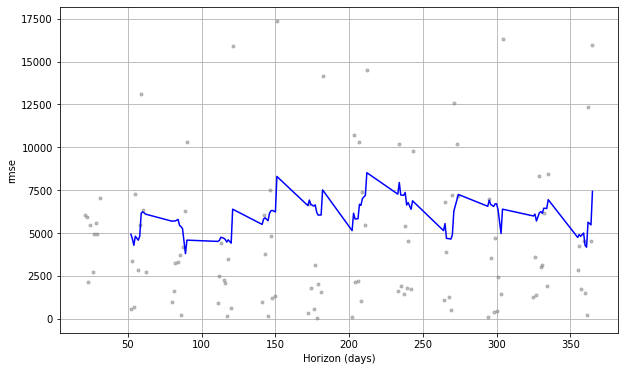

In [31]:
plot_cross_validation_metric(df_cv,metric='rmse');